Epoch 1/10


/Users/garyshen/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1121/1121 [==============================] - 130s 110ms/step - loss: 1.8206 - accuracy: 0.2466
Epoch 2/10
1121/1121 [==============================] - 134s 119ms/step - loss: 1.8143 - accuracy: 0.2505
Epoch 3/10
1121/1121 [==============================] - 135s 120ms/step - loss: 1.8127 - accuracy: 0.2505
Epoch 4/10
1121/1121 [==============================] - 134s 120ms/step - loss: 1.8116 - accuracy: 0.2505
Epoch 5/10
1121/1121 [==============================] - 133s 119ms/step - loss: 1.8116 - accuracy: 0.2504
Epoch 6/10
1121/1121 [==============================] - 132s 118ms/step - loss: 1.8113 - accuracy: 0.2506
Epoch 7/10
1121/1121 [==============================] - 133s 119ms/step - loss: 1.8114 - accuracy: 0.2505
Epoch 8/10
1121/1121 [==============================] - 131s 117ms/step - loss: 1.8113 - accuracy: 0.2505
Epoch 9/10
1121/1121 [==============================] - 131s 117ms/step - loss: 1.8112 - accuracy: 0.2505
Epoch 10/10
1121/1121 [==============================] - 

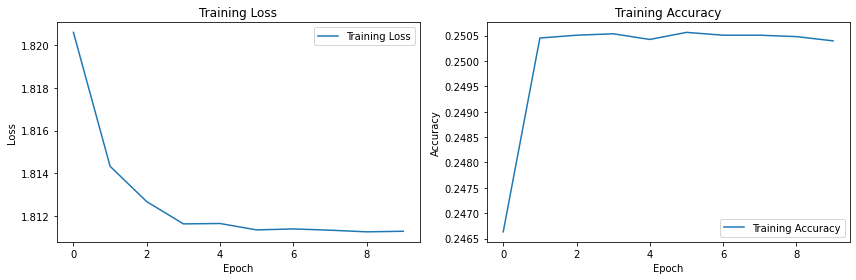

Epoch 1/20
1121/1121 [==============================] - 499s 435ms/step - loss: 1.7420 - accuracy: 0.3006
Epoch 2/20
1121/1121 [==============================] - 447s 399ms/step - loss: 1.6036 - accuracy: 0.3721
Epoch 3/20
1121/1121 [==============================] - 445s 397ms/step - loss: 1.5066 - accuracy: 0.4190
Epoch 4/20
1121/1121 [==============================] - 444s 396ms/step - loss: 1.4360 - accuracy: 0.4467
Epoch 5/20
1121/1121 [==============================] - 513s 458ms/step - loss: 1.3819 - accuracy: 0.4713
Epoch 6/20
1121/1121 [==============================] - 523s 466ms/step - loss: 1.3394 - accuracy: 0.4870
Epoch 7/20
1121/1121 [==============================] - 479s 428ms/step - loss: 1.2974 - accuracy: 0.5057
Epoch 8/20
1121/1121 [==============================] - 492s 439ms/step - loss: 1.2659 - accuracy: 0.5172
Epoch 9/20
1121/1121 [==============================] - 500s 446ms/step - loss: 1.2410 - accuracy: 0.5244
Epoch 10/20
1121/1121 [=======================

<module 'matplotlib.pyplot' from '/Users/garyshen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

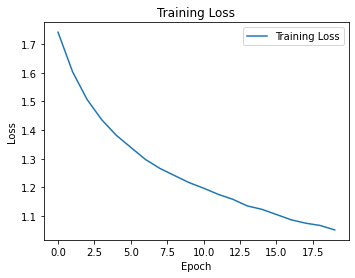

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Step 1: Download and load the FER-2013 dataset (CSV file)
# Load the CSV file using pandas
data = pd.read_csv('/Users/garyshen/embedded ai/emotion_detection_clean/fer2013.csv')

# Extract image pixels and labels from the CSV file
pixels = data['pixels'].tolist()
labels = data['emotion'].tolist()

# Convert pixels to numpy arrays and normalize the values
images = np.array([np.fromstring(pixel, dtype='uint8', sep=' ') for pixel in pixels])
images = images.reshape((-1, 48, 48, 1))
images = images.astype('float32') / 255.0

# Convert labels to categorical format
labels = tf.keras.utils.to_categorical(labels, num_classes=7)

# Step 2: Define the model architecture
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Larger classifier
x = Dense(512, activation='relu')(x)  # Larger classifier
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Step 3: Perform transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Step 4: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 5: Compile and train the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    datagen.flow(images, labels, batch_size=32),
    steps_per_epoch=len(images) // 32,
    epochs=10
)

# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Fine-tuning
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    datagen.flow(images, labels, batch_size=32),
    steps_per_epoch=len(images) // 32,
    epochs=20
)

# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt


Epoch 1/10
113/113 [==============================] - 229s 2s/step - loss: 1.9347 - accuracy: 0.2150 - val_loss: 1.8455 - val_accuracy: 0.2476
Epoch 2/10
113/113 [==============================] - 223s 2s/step - loss: 1.8083 - accuracy: 0.2515 - val_loss: 1.8175 - val_accuracy: 0.2476
Epoch 3/10
113/113 [==============================] - 218s 2s/step - loss: 1.7853 - accuracy: 0.2648 - val_loss: 1.8516 - val_accuracy: 0.2476
Epoch 4/10
113/113 [==============================] - 223s 2s/step - loss: 1.7649 - accuracy: 0.2782 - val_loss: 1.8233 - val_accuracy: 0.2476
Epoch 5/10
113/113 [==============================] - 234s 2s/step - loss: 1.7409 - accuracy: 0.2983 - val_loss: 1.8196 - val_accuracy: 0.2476
Epoch 6/10
113/113 [==============================] - 232s 2s/step - loss: 1.7271 - accuracy: 0.3070 - val_loss: 1.8317 - val_accuracy: 0.2476
Epoch 7/10
113/113 [==============================] - 234s 2s/step - loss: 1.7085 - accuracy: 0.3163 - val_loss: 9.7254 - val_accuracy: 0.1351

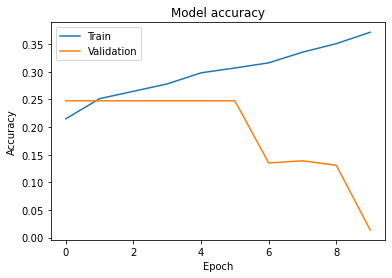

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
BATCH_SIZE = 256
IMG_SIZE = 224
NUM_CLASSES = 7
EPOCHS = 10

# Load the data from the CSV file
data = pd.read_csv('/Users/garyshen/embedded ai/emotion_detection_clean/fer2013.csv')

# Extract image pixels and labels from the CSV file
pixels = data['pixels'].tolist()
labels = data['emotion'].tolist()

# Convert pixel values to images
images = []
for pixel_seq in pixels:
    pixel_list = [int(pixel) for pixel in pixel_seq.split()]
    image = np.array(pixel_list, dtype='uint8').reshape((48, 48, 1))
    images.append(image)

# Normalize the images
images = np.array(images) / 255.0

# Split the data into training and validation sets
train_images, valid_images, train_labels, valid_labels = train_test_split(images, labels, test_size=0.2, shuffle=True)

# Create data generator for training and validation
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE)
valid_data = valid_datagen.flow(valid_images, valid_labels, batch_size=BATCH_SIZE)

# Create the model
efnet_b0 = EfficientNetB0(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = GlobalAveragePooling2D()(efnet_b0.output)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model = tf.keras.Model(inputs=efnet_b0.input, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and track the accuracy and validation accuracy
history = model.fit(train_data, epochs=EPOCHS, validation_data=valid_data)

# Plot the accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
